We are using a data set from a bakery store. 
It has details on the transactions for two years.
I will look through the data to form a meaningful hypothesis.

The two years of data will provide me a simulated view of the bakery after applying the hypothesis.
I would use one year as control and the other year as the experiment and compare the results.

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('breadbasket_dms.csv')

#look at unique items
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

I remove items that don't look like food.

In [3]:
df= df.loc[~df['Item'].isin(['NONE','Adjustment','Gift voucher','Keeping It Local'])]
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Art Tray', 'Bowl Nic Pitt',
       'Bread Pudding', 'Truffles', 'Chimichurri Oil', 'Bacon', 'Spread',
       'Kids biscuit', 'Siblings', 'Caramel bites', 'Jammie Dodgers',
       'Tiffin', 'Olum & polenta', 'Polenta', 'The Nomad',
       'Hack the stack', 'Bakewell', 'Lemon and coconut', 'Toast',
       'Scone', 'Crepes', 'Vegan mincepie', 'Bare Popcorn', 'Muesli',
       'Crisps', 'Pintxos', 'Gingerbread syrup', 'Panatone',
 

Filter out food that is not on both transaction years

In [4]:
year_1_data = df.loc[df['Date'] < '2017-01-01']
year_2_data = df.loc[df['Date'] >= '2017-01-01']

y1_items= (year_1_data.Item.unique())
y2_items= (year_2_data.Item.unique())

only_y1_items = []
for item in y1_items:
    if item not in y2_items:
        only_y1_items.append(item)
print(only_y1_items)

only_y2_items = []
for item in y2_items:
    if item not in y1_items:
        only_y2_items.append(item)
print(only_y2_items)


['Tartine', 'Basket', 'Victorian Sponge', 'Pick and Mix Bowls', 'Mighty Protein', 'Chicken sand', 'Dulce de Leche', 'The BART', 'Fairy Doors', 'Empanadas', 'Bowl Nic Pitt', 'Bread Pudding', 'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings', 'Caramel bites', 'Olum & polenta', 'Polenta', 'Hack the stack', 'Lemon and coconut', 'Crepes', 'Pintxos', 'Panatone']
['Afternoon with the baker', 'Salad', 'Chicken Stew', 'Spanish Brunch', 'Raspberry shortbread sandwich', 'Extra Salami or Feta', 'Duck egg', 'Baguette', "Valentine's card", 'Tshirt', 'Vegan Feast', 'Postcard', 'Nomad bag', 'Chocolates', 'Coffee granules ', 'Drinking chocolate spoons ', 'Christmas common', 'Argentina Night', 'Half slice Monster ', 'Cherry me Dried fruit', 'Mortimer', 'Raw bars', 'Tacos/Fajita']


Remove items and test if there are still items that don't show up in both years

In [5]:
df = df.loc[~df['Item'].isin(['Tartine','Basket', 'Victorian Sponge', 'Pick and Mix Bowls', 'Mighty Protein', 'Chicken sand', 'Dulce de Leche', 'The BART', 'Fairy Doors', 'Empanadas', 'Bowl Nic Pitt', 'Bread Pudding', 'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings', 'Caramel bites', 'Olum & polenta', 'Polenta', 'Hack the stack', 'Lemon and coconut', 'Crepes', 'Pintxos', 'Panatone','Afternoon with the baker', 'Salad', 'Chicken Stew', 'Spanish Brunch', 'Raspberry shortbread sandwich', 'Extra Salami or Feta', 'Duck egg', 'Baguette', "Valentine's card", 'Tshirt', 'Vegan Feast', 'Postcard', 'Nomad bag', 'Chocolates', 'Coffee granules ', 'Drinking chocolate spoons ', 'Christmas common', 'Argentina Night', 'Half slice Monster ', 'Cherry me Dried fruit', 'Mortimer', 'Raw bars', 'Tacos/Fajita'])]
year_1_data = df.loc[df['Date'] < '2017-01-01']
year_2_data = df.loc[df['Date'] >= '2017-01-01']

y1_items= (year_1_data.Item.unique())
y2_items= (year_2_data.Item.unique())

only_y1_items = []
for item in y1_items:
    if item not in y2_items:
        only_y1_items.append(item)
print(only_y1_items)

only_y2_items = []
for item in y2_items:
    if item not in y1_items:
        only_y2_items.append(item)
print(only_y2_items)

[]
[]


Get a counts of items sold in year 1

In [6]:
year1_dict = dict(year_1_data['Item'].value_counts())
year2_foods = dict(year_2_data['Item'].value_counts())

Analysis that highlights your experimental hypothesis.
From the exploratory work before, I have built a modified version of the data to perform comparative analysis across transaction years.

The problem:
We want to increase profitability of the bakery by utilizing prior transaction data.

A rollout plan showing how you would implement and rollout the experiment

The potential solution:
The transaction data has item information that can be used to determine which items are not in high demand and thus could be removed to make room to sell more in demand items.

I got a list of foods that are ordered and looking at the data I cut it off at 30 of the same item type for the year.

Not in demand items are determined by count of the particular item for a given year.
transactions for 2016 is the control year (Year 1)
the 2017 transactions will be the test year (Year 2)

If the counts for year 2 for the same set of items are higher overall then I can conclude that removing not in demand items increase sales of more in common items.


An evaluation plan showing what constitutes success in this experiment

I would the the stats.ttest_ind between year 1 and year 2 values to determine correlation
A line chart and column chart would help visualize the differences.

Get a list of foods that are ordered the most.  We cut off at 30 items for the period before.

In [7]:
year1_foods = { k: v for k, v in year1_dict.items() if v >= 30 }
year1_foods

{'Coffee': 2214,
 'Bread': 1390,
 'Tea': 577,
 'Pastry': 366,
 'Medialuna': 362,
 'Cake': 263,
 'Hot chocolate': 261,
 'Sandwich': 235,
 'Farm House': 200,
 'Muffin': 198,
 'Brownie': 191,
 'Alfajores': 186,
 'Cookies': 166,
 'Scandinavian': 155,
 'Fudge': 121,
 'Juice': 110,
 'Jam': 108,
 'Soup': 106,
 'Hearty & Seasonal': 93,
 'Scone': 69,
 'Mineral water': 66,
 'Toast': 65,
 'Coke': 64,
 'Truffles': 56,
 'Frittata': 49,
 'Focaccia': 40,
 'Vegan mincepie': 33}

In [8]:
foodNames = sorted(list(year1_foods.keys()))
print(foodNames)

['Alfajores', 'Bread', 'Brownie', 'Cake', 'Coffee', 'Coke', 'Cookies', 'Farm House', 'Focaccia', 'Frittata', 'Fudge', 'Hearty & Seasonal', 'Hot chocolate', 'Jam', 'Juice', 'Medialuna', 'Mineral water', 'Muffin', 'Pastry', 'Sandwich', 'Scandinavian', 'Scone', 'Soup', 'Tea', 'Toast', 'Truffles', 'Vegan mincepie']


In [9]:
year1_values = []
year2_values = []
for foodName in foodNames:
    year1_values.append(year1_foods[foodName])
    year2_values.append(year2_foods[foodName])
    #print(foodName, year2_foods[foodName])
    #print(foodName, year1_foods[foodName])

In [10]:
stats.ttest_ind(year2_values, year1_values)

Ttest_indResult(statistic=0.7815781216054207, pvalue=0.4380067583170587)

In [11]:
data = pd.DataFrame({'Food Name': foodNames,
                     'Year 1': year1_values,
                     'Year 2': year2_values
                    })

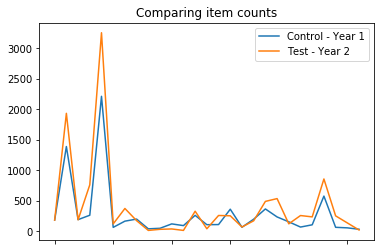

In [12]:
fig = data[['Food Name', 'Year 1']].plot()
data[['Food Name', 'Year 2']].plot(ax=fig)

plt.legend(['Control - Year 1', 'Test - Year 2'])
plt.setp(fig.get_xticklabels(), visible=False)
plt.title('Comparing item counts')
plt.show()

Removing the least commonly purchased foods have no effect on purchases of most commonly purchased items.

In [13]:
size = len(foodNames)
foodNames = foodNames * 2
counts = []
counts.extend(year1_values)
counts.extend(year2_values)
value_type = []
value_type.extend(['Control'] * size)
value_type.extend(['Test'] * size)

In [14]:
bardata = pd.DataFrame({'Food Name': foodNames,
                     'total': counts,
                     'value_type': value_type
                    })

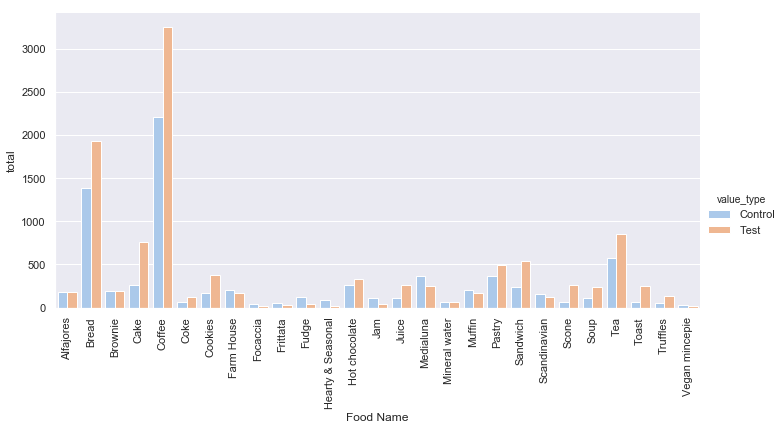

In [15]:
sns.set(style="darkgrid")

g = sns.catplot(x="Food Name", y="total", hue="value_type", data=bardata, aspect=2,height=5, kind="bar", palette="pastel")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)